# Optimization study of the NMF method

In this part of the project I studied how the approximation of the NMF images improves for each number (from 0 to 9) as I increase the rank of the matrices involved in the NMF method. For this purpose, I have defined the variable "Similitude" from 0 to 1, where if Similitude is equal to 1, it means that the NMF image is the same as the original image, and if Similitude is close to 0, then the two images are very different. Given that the initial matrix is of the form 784x10.000, it is interesting to note that Similitude equal to 1 would be achieved if we considered a rank of 10.000. In fact, in that case no information would be lost.

Processing first rank: 1
Processing rank: 10
Processing rank: 20
Processing rank: 30
Processing rank: 40
Processing rank: 50
Processing rank: 60
Processing rank: 70
Processing rank: 80
Processing rank: 90
Processing rank: 100


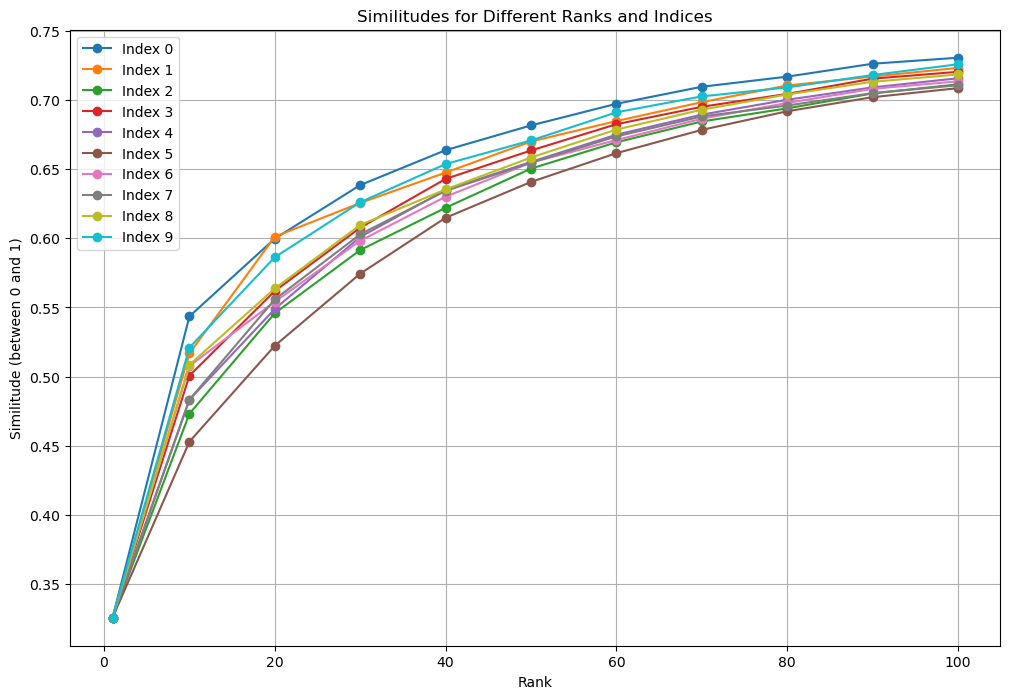

In [170]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore',category=ConvergenceWarning)

# Load the data
all_pixels = []
list_labels = []

with open('./mnist_test.csv', 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    next(csvreader)
    for data in csvreader:
        label = data[0]
        list_labels.append(label)
        pixels = data[1:]
        pixels = np.array(pixels, dtype='int64')
        all_pixels.append(pixels)

all_pixels_matrix = np.array(all_pixels)
all_pixels_matrixT = all_pixels_matrix.T

# Normalize the data
scaler = MinMaxScaler()
all_pixels_matrixT = scaler.fit_transform(all_pixels_matrixT)

# Index lists
indices = {f"index_{i}": [] for i in range(10)}
for i, label in enumerate(list_labels):
    indices[f"index_{label}"].append(i)

# Mean value function
def mean_value(vector):
    return sum(vector) / len(vector) if vector else 0

# Initialize a dictionary to store similitudes for each number between 0 and 9
similitudes = {i: [] for i in range(10)}

ranks = [1,10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Process the first rank separately to get the baseline similitude
first_rank = ranks[0]
print(f"Processing first rank: {first_rank}")
model = NMF(n_components=first_rank, max_iter=50, random_state=42)
W = model.fit_transform(all_pixels_matrixT)
H = model.components_

V = np.dot(W, H)
V_Tmatrix = V.T

first_rank_similitudes = []
for i in range(10):
    index_list = indices[f"index_{i}"]
    rank_similitudes = []
    for index in index_list:
        wrow1 = all_pixels_matrix[int(index)]
        wrow2 = V_Tmatrix[int(index), :]
        diff_row = wrow1 - wrow2
        squar_sum = np.sum(diff_row**2)
        initial_squar = np.sum(wrow1**2)
        similitude = (1 - (squar_sum / initial_squar)) * 100
        rank_similitudes.append(similitude)
    mean_similitude = mean_value(rank_similitudes)
    similitudes[i].append(mean_similitude)
    first_rank_similitudes.append(mean_similitude)

# Set the same baseline similitude for all indices for the first rank
baseline_similitude = mean_value(first_rank_similitudes)
for i in range(10):
    similitudes[i][0] = baseline_similitude

# Process the remaining ranks
for rank in ranks[1:]:
    print(f"Processing rank: {rank}")
    model = NMF(n_components=rank, max_iter=50, random_state=42)
    W = model.fit_transform(all_pixels_matrixT)
    H = model.components_

    V = np.dot(W, H)
    V_Tmatrix = V.T

    for i in range(10):
        index_list = indices[f"index_{i}"]
        rank_similitudes = []
        for index in index_list:
            wrow1 = all_pixels_matrix[int(index)]
            wrow2 = V_Tmatrix[int(index), :]
            diff_row = wrow1 - wrow2
            squar_sum = np.sum(diff_row**2)
            initial_squar = np.sum(wrow1**2)
            similitude = (1 - (squar_sum / initial_squar)) * 100
            rank_similitudes.append(similitude)
        mean_similitude = mean_value(rank_similitudes)
        similitudes[i].append(mean_similitude)

# Plot all the graphs in the same figure
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.plot(ranks, similitudes[i], marker='o', label=f'Index {i}')
plt.xlabel('Rank')
plt.ylabel('Similitude (between 0 and 1)')
plt.title('Similitudes for Different Ranks and Indices')
plt.legend()
plt.grid(True)
plt.show()


It can be seen that the results are satisfactory, as the Similitude increases with the Rank. As the rank increases, the similitudes of all the numbers tend to converge, while for lower ranks this is not the case. The best similitudes are achieved for the numbers "0", while the worst ones are for the numbers "5". 

For the case of the number 0, given that the Similitude depends on the area of the number considered (the greater the area, the greater the Similitude), the mystery is solved by checking that the mean of the areas of all the numbers "0" is greater than the mean of the areas of all the other numbers.

For the case of the number 5, given that the number 5 is not the one with the smallest area among all the numbers, we will study the fact that among all the numbers "5" in the MNIST dataset, there is greater variance than for the other numbers (meaning that all the numbers "5" are more different between them).

In the following sections, we will demonstrate these hypotheses.

Processing rank: 1
Processing rank: 10
Processing rank: 20
Processing rank: 30
Processing rank: 40
Processing rank: 50
Processing rank: 60
Processing rank: 70
Processing rank: 80
Processing rank: 90
Processing rank: 100


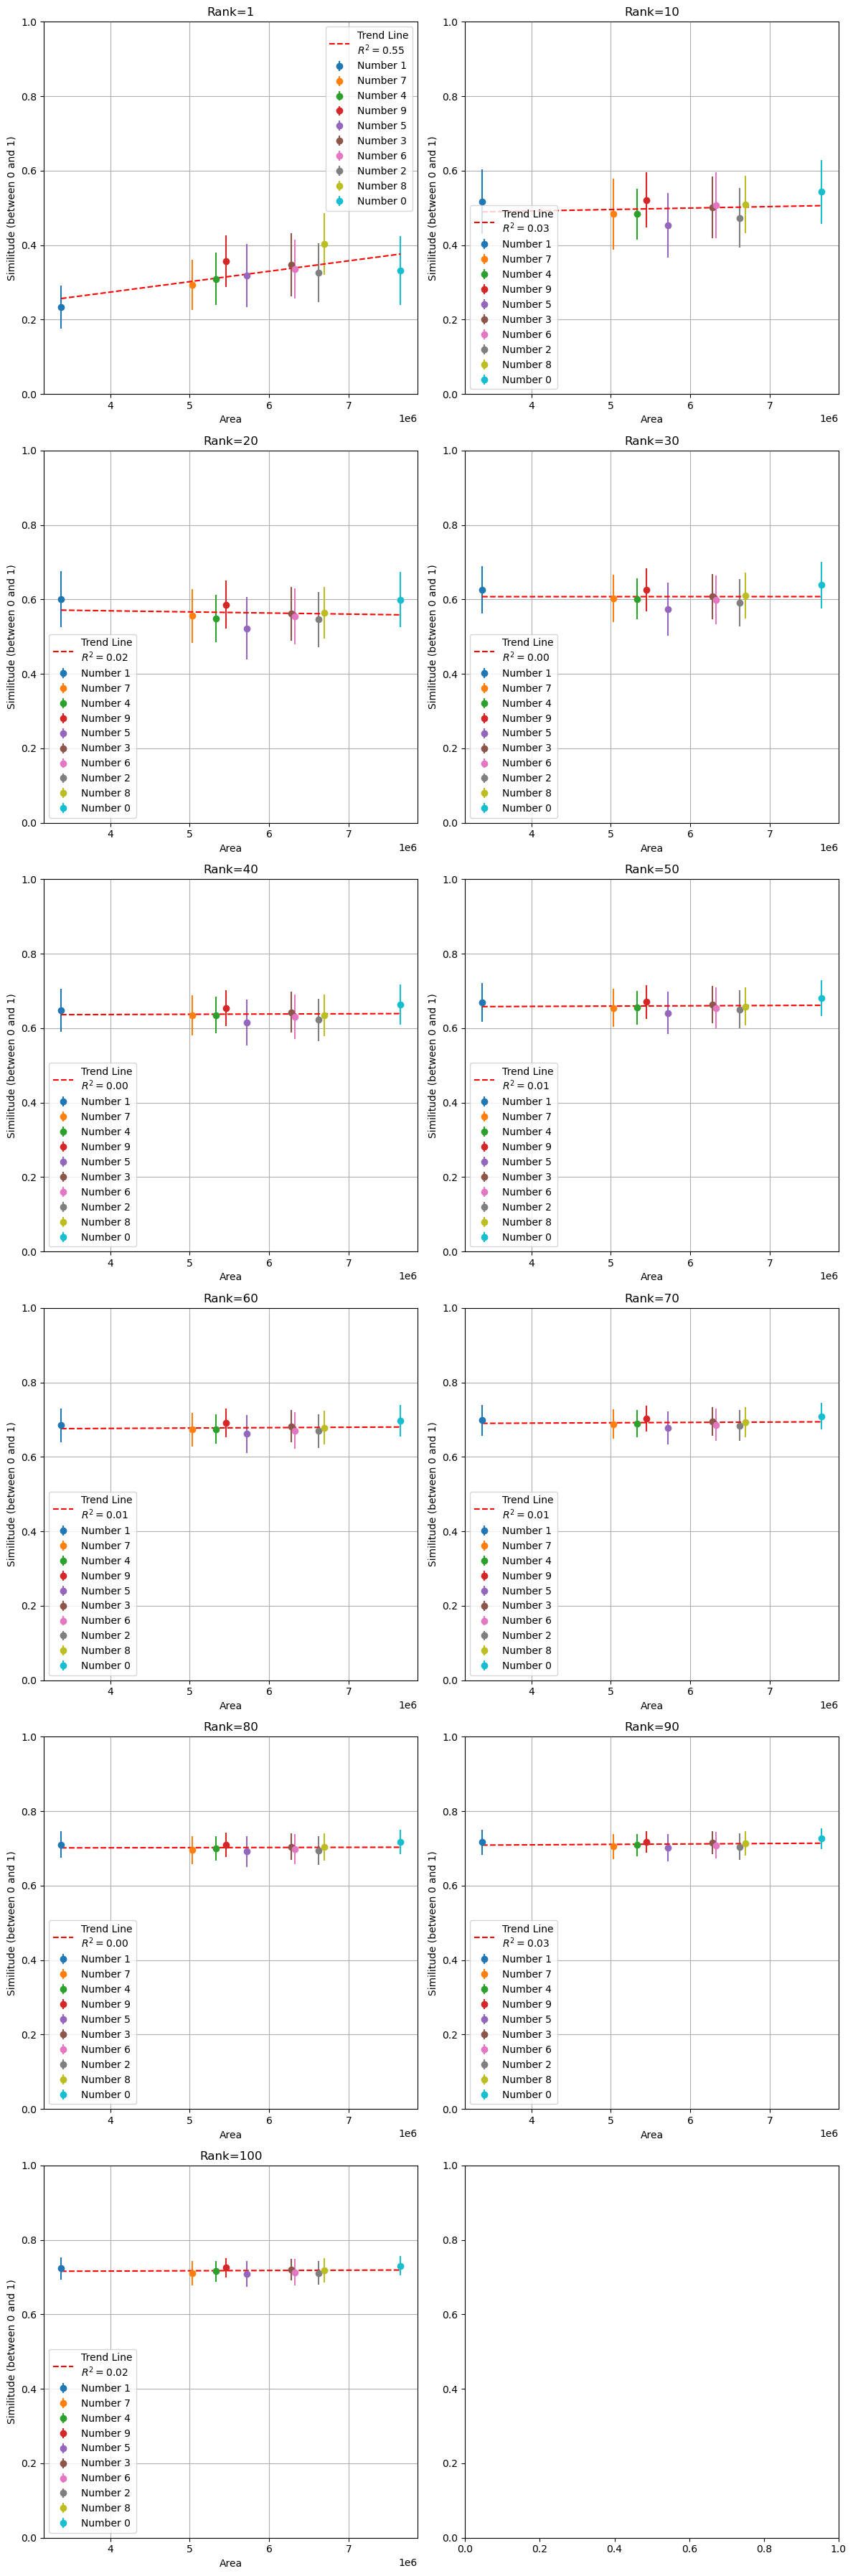

In [7]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings('ignore',category=ConvergenceWarning)

# Load the data
all_pixels = []
list_labels = []

with open('./mnist_test.csv', 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    next(csvreader)
    for data in csvreader:
        label = data[0]
        list_labels.append(label)
        pixels = data[1:]
        pixels = np.array(pixels, dtype='int64')
        all_pixels.append(pixels)

all_pixels_matrix = np.array(all_pixels)
all_pixels_matrixT = all_pixels_matrix.T

# Normalize the data
scaler = MinMaxScaler()
all_pixels_matrixT = scaler.fit_transform(all_pixels_matrixT)

# Index lists
indices = {f"index_{i}": [] for i in range(10)}
for i, label in enumerate(list_labels):
    indices[f"index_{label}"].append(i)


def quick_sort(arr, indices=None):
    if indices is None:
        indices = list(range(len(arr)))

    if len(arr) <= 1:
        return arr, indices

    pivot_index = len(arr) // 2
    pivot = arr[pivot_index]
    
    left, left_indices = [], []
    middle, middle_indices = [], []
    right, right_indices = [], []

    for i in range(len(arr)):
        if arr[i] < pivot:
            left.append(arr[i])
            left_indices.append(indices[i])
        elif arr[i] == pivot:
            middle.append(arr[i])
            middle_indices.append(indices[i])
        else:
            right.append(arr[i])
            right_indices.append(indices[i])

    sorted_left, sorted_left_indices = quick_sort(left, left_indices)
    sorted_right, sorted_right_indices = quick_sort(right, right_indices)

    sorted_arr = sorted_left + middle + sorted_right
    sorted_indices = sorted_left_indices + middle_indices + sorted_right_indices

    return sorted_arr, sorted_indices

# Replace `ranks` with your list of ranks
ranks = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Calculate the number of rows and columns for the subplots
num_ranks = len(ranks)
cols = 2
rows = (num_ranks + 1) // cols

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

for idx, rank in enumerate(ranks):
    print(f"Processing rank: {rank}")
    model = NMF(n_components=rank, max_iter=50, random_state=42)
    W = model.fit_transform(all_pixels_matrixT)
    H = model.components_

    V = np.dot(W, H)
    V_Tmatrix = V.T
    similitudes = []
    areas = []
    stan_deviations_sim = []
    stan_deviations_area = []
    
    for i in range(10):
        index_list = indices[f"index_{i}"]
        rank_similitudes = []
        rank_areas = []
        
        for index in index_list:
            wrow1 = all_pixels_matrix[int(index)]
            wrow2 = V_Tmatrix[int(index), :]
            diff_row = wrow1 - wrow2
            area = np.sum(wrow1**2)
            squar_sum = np.sum(diff_row**2)
            similitude = (1 - (squar_sum / area)) * 100
            rank_similitudes.append(similitude)
            rank_areas.append(area)
        mean_similitude = np.mean(rank_similitudes)
        stan_dev_area=np.std(rank_areas)
        stan_dev_similitude = np.std(rank_similitudes)
        stan_deviations_area.append(stan_dev_area)
        stan_deviations_sim.append(stan_dev_similitude)
        similitudes.append(mean_similitude)
        mean_area = np.mean(rank_areas)
        areas.append(mean_area)

    sorted_areas, sorted_areas_indexes = quick_sort(areas)

    # Select the appropriate subplot
    ax = axes[idx // cols, idx % cols]

    # Plotting the points with error bars
    x_values = []
    x_errors = []    
    y_values = []
    y_errors = []
    for i in range(10):
        j = sorted_areas_indexes[i]
        y_values.append(similitudes[j])
        y_errors.append(stan_deviations_sim[j])
        ax.errorbar(sorted_areas[i], similitudes[j],yerr=stan_deviations_sim[j], fmt='o', label="Number "+str(j))
    
    # Fit a line to the data
    x_values = sorted_areas[:10]  # Only the first 10 points
    y_values = [similitudes[sorted_areas_indexes[i]] for i in range(10)]
    coefficients = np.polyfit(x_values, y_values, 1)
    trendline = np.poly1d(coefficients)

    # Calculate R²
    y_pred = trendline(x_values)
    ss_tot = np.sum((y_values - np.mean(y_values)) ** 2)
    ss_res = np.sum((y_values - y_pred) ** 2)
    r_squared = 1 - (ss_res / ss_tot)

    # Plot the trend line
    ax.plot(x_values, trendline(x_values), color='red', linestyle='--', label=f'Trend Line\n$R^2={r_squared:.2f}$')

    # Labeling the axes and the plot
    ax.set_xlabel('Area')
    ax.set_ylabel('Similitude (between 0 and 1)')
    ax.set_ylim(0, 1)
    ax.set_title('Rank=' + str(rank))
    ax.legend()
    ax.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


With the results above, we conclude that the numbers "0" are the ones with a greater area on average than all the other numbers, as we wanted to prove. The succession of the images, each one representing a different rank, shows that as the rank increases, the error bars (representing the standard deviations of the similitudes for each picture of the same number) tend to get smaller. This makes sense because, as we saw before, all the Similitudes tend to converge when the rank increases. We can also see from the pictures that, as the rank increases, all the 10 numbers tend to show a better linear tendency (it can be seen in the fact that the determination coefficient R^2 tends to 0 as the rank increases), and that the slope of the fit line progressively tends to 0, showing not only greater homogeneity among the Similitudes for the different pictures of a same number but also greater homogeneity in the Similitudes of the 10 different numbers.

Processing rank: 1
Processing rank: 2
Processing rank: 3


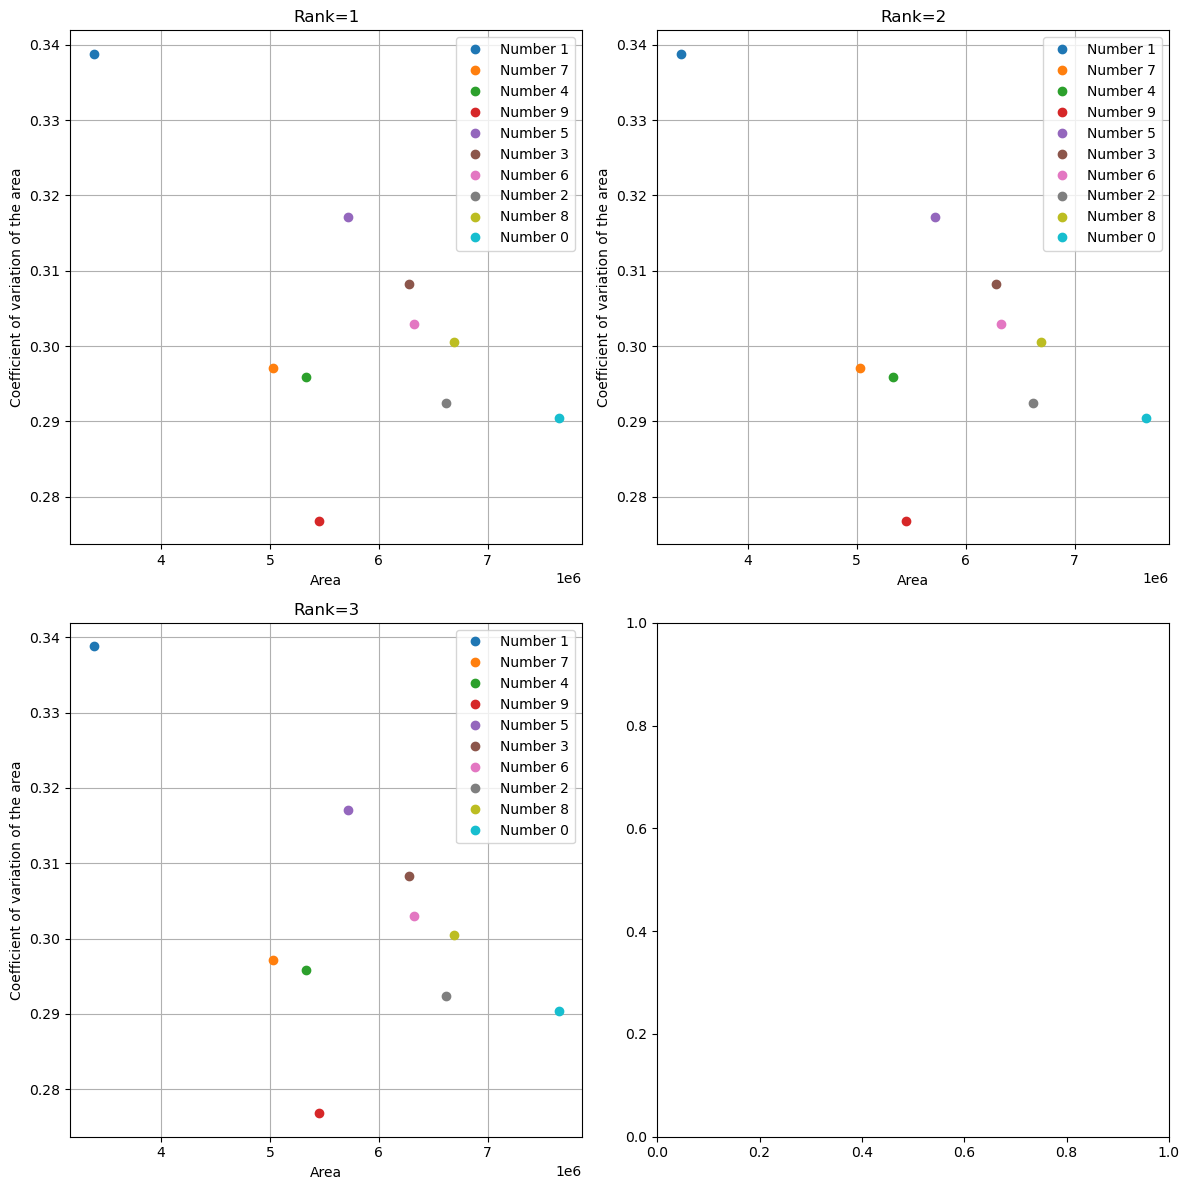

In [38]:
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import NMF
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore',category=ConvergenceWarning)

# Load the data
all_pixels = []
list_labels = []

with open('./mnist_test.csv', 'r') as csv_file:
    csvreader = csv.reader(csv_file)
    next(csvreader)
    for data in csvreader:
        label = data[0]
        list_labels.append(label)
        pixels = data[1:]
        pixels = np.array(pixels, dtype='int64')
        all_pixels.append(pixels)

all_pixels_matrix = np.array(all_pixels)
all_pixels_matrixT = all_pixels_matrix.T

# Normalize the data
scaler = MinMaxScaler()
all_pixels_matrixT = scaler.fit_transform(all_pixels_matrixT)

# Index lists
indices = {f"index_{i}": [] for i in range(10)}
for i, label in enumerate(list_labels):
    indices[f"index_{label}"].append(i)



def quick_sort(arr, indices=None):
    if indices is None:
        indices = list(range(len(arr)))

    if len(arr) <= 1:
        return arr, indices

    pivot_index = len(arr) // 2
    pivot = arr[pivot_index]
    
    left, left_indices = [], []
    middle, middle_indices = [], []
    right, right_indices = [], []

    for i in range(len(arr)):
        if arr[i] < pivot:
            left.append(arr[i])
            left_indices.append(indices[i])
        elif arr[i] == pivot:
            middle.append(arr[i])
            middle_indices.append(indices[i])
        else:
            right.append(arr[i])
            right_indices.append(indices[i])

    sorted_left, sorted_left_indices = quick_sort(left, left_indices)
    sorted_right, sorted_right_indices = quick_sort(right, right_indices)

    sorted_arr = sorted_left + middle + sorted_right
    sorted_indices = sorted_left_indices + middle_indices + sorted_right_indices

    return sorted_arr, sorted_indices

# Replace `ranks` with your list of ranks
ranks = [1, 2, 3]

# Calculate the number of rows and columns for the subplots
num_ranks = len(ranks)
cols = 2
rows = (num_ranks + 1) // cols

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 6 * rows))

for idx, rank in enumerate(ranks):
    print(f"Processing rank: {rank}")
    model = NMF(n_components=rank, max_iter=50, random_state=42)
    W = model.fit_transform(all_pixels_matrixT)
    H = model.components_

    V = np.dot(W, H)
    V_Tmatrix = V.T
    areas = []
    stan_deviations_area = []
    pearsons=[]
    
    for i in range(10):
        index_list = indices[f"index_{i}"]
        rank_areas = []
        
        for index in index_list:
            wrow1 = all_pixels_matrix[int(index)]
            wrow2 = V_Tmatrix[int(index), :]
            diff_row = wrow1 - wrow2
            area = np.sum(wrow1**2)
            rank_areas.append(area)
        stan_dev_area=np.std(rank_areas, ddof=1)
        stan_deviations_area.append(stan_dev_area)
        mean_area = np.mean(rank_areas)
        pearson=stan_dev_area/mean_area
        pearsons.append(pearson)
        areas.append(mean_area)
    sorted_areas, sorted_areas_indexes = quick_sort(areas)

    # Select the appropriate subplot
    ax = axes[idx // cols, idx % cols]

    # Plotting the points with error bars
    x_values = []
    x_errors = []    
    y_values = []
    y_errors = []
    for i in range(10):
        j = sorted_areas_indexes[i]
        ax.errorbar(sorted_areas[i], pearsons[j], fmt='o', label="Number "+str(j))


    # Labeling the axes and the plot
    ax.set_xlabel('Area')
    ax.set_ylabel('Coefficient of variation of the area')
    ax.set_title('Rank=' + str(rank))
    ax.legend()
    ax.grid(True)
    
# Adjust layout
plt.tight_layout()
plt.show()


In the results above, I studied the greater variance in the pictures of the numbers "5". There are 3 pictures for 3 different ranks to show that the graphs in this case do not depend on the rank, since we are considering the areas of the original pictures, along with their coefficients of variation. As we expected, we can see that the number 5 has the second-highest coefficient of variation, showing us that all the numbers "5" are much more different between themselves than all the numbers "9" (the number 9 is the one with the lowest coefficient of variation). This gives us an explanation as to why in the first graph we obtained in this part of the project the number 5 was the one that for all the ranks had the worst Similitudes.